<a href="https://colab.research.google.com/github/ThierrryScotto/prophet_coursera/blob/main/learner_notebook_prophet_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tesla (TSLA) Stock Price prediction using Facebook Prophet

##Importing all the necessary libraries

In [1]:
!pip install prophet

In [2]:
import pandas as pd
import plotly.io as pio
import plotly.express as px

from prophet import Prophet

In [3]:
pio.renderers.default = 'colab'

##Importing the dataset

In [4]:
df = pd.read_csv('/content/AMZN.csv')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-12,14.878000,14.925500,14.464000,14.570500,14.570500,68428000
1,2015-01-13,14.874000,15.075000,14.661500,14.737000,14.737000,82728000
2,2015-01-14,14.596500,14.795500,14.325000,14.663500,14.663500,110774000
3,2015-01-15,14.700000,14.800000,14.341000,14.347500,14.347500,88384000
4,2015-01-16,14.314000,14.539500,14.262500,14.537000,14.537000,69564000
...,...,...,...,...,...,...,...
2281,2024-02-05,170.199997,170.550003,167.699997,170.309998,170.309998,55081300
2282,2024-02-06,169.389999,170.710007,167.649994,169.149994,169.149994,42505500
2283,2024-02-07,169.479996,170.880005,168.940002,170.529999,170.529999,47174100
2284,2024-02-08,169.649994,171.429993,168.880005,169.839996,169.839996,42316500


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2286 entries, 0 to 2285
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2286 non-null   object 
 1   Open       2286 non-null   float64
 2   High       2286 non-null   float64
 3   Low        2286 non-null   float64
 4   Close      2286 non-null   float64
 5   Adj Close  2286 non-null   float64
 6   Volume     2286 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 125.1+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2286.000000,2286.000000,2286.000000,2286.000000,2286.000000,2.286000e+03
mean,92.978579,94.058062,91.808170,92.955915,92.955915,7.974483e+07
std,48.833220,49.439518,48.180875,48.799986,48.799986,4.059640e+07
min,14.314000,14.539500,14.262500,14.347500,14.347500,1.762600e+07
25%,45.362000,45.505876,44.972251,45.344124,45.344124,5.363918e+07
50%,91.178497,92.050003,90.252998,91.039001,91.039001,6.832200e+07
75%,135.214997,137.447498,133.877872,135.382499,135.382499,9.298800e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


In [10]:
df.shape

(2286, 7)

##Data Visualization

In [11]:
px.area(df, x="Date", y="Close")

In [12]:
px.area(df, x="Date", y="Volume")

In [13]:
px.bar(df, y='Volume')

In [14]:
px.box(df, y='Close')

##Data Preparation & Modelling

In [15]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-12,14.878000,14.925500,14.464000,14.570500,14.570500,68428000
1,2015-01-13,14.874000,15.075000,14.661500,14.737000,14.737000,82728000
2,2015-01-14,14.596500,14.795500,14.325000,14.663500,14.663500,110774000
3,2015-01-15,14.700000,14.800000,14.341000,14.347500,14.347500,88384000
4,2015-01-16,14.314000,14.539500,14.262500,14.537000,14.537000,69564000
...,...,...,...,...,...,...,...
2281,2024-02-05,170.199997,170.550003,167.699997,170.309998,170.309998,55081300
2282,2024-02-06,169.389999,170.710007,167.649994,169.149994,169.149994,42505500
2283,2024-02-07,169.479996,170.880005,168.940002,170.529999,170.529999,47174100
2284,2024-02-08,169.649994,171.429993,168.880005,169.839996,169.839996,42316500


In [16]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)

ndf

,Date,Close
0,2015-01-12,14.570500
1,2015-01-13,14.737000
2,2015-01-14,14.663500
3,2015-01-15,14.347500
4,2015-01-16,14.537000
...,...,...
2281,2024-02-05,170.309998
2282,2024-02-06,169.149994
2283,2024-02-07,170.529999
2284,2024-02-08,169.839996


In [17]:
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df

,ds,y
0,2015-01-12,14.570500
1,2015-01-13,14.737000
2,2015-01-14,14.663500
3,2015-01-15,14.347500
4,2015-01-16,14.537000
...,...,...
2281,2024-02-05,170.309998
2282,2024-02-06,169.149994
2283,2024-02-07,170.529999
2284,2024-02-08,169.839996


##Creating Facebbook Prophet Model

In [18]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5yb6t5de/5gqrr1_e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5yb6t5de/_ti1euzg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56280', 'data', 'file=/tmp/tmp5yb6t5de/5gqrr1_e.json', 'init=/tmp/tmp5yb6t5de/_ti1euzg.json', 'output', 'file=/tmp/tmp5yb6t5de/prophet_model0ael54qr/prophet_model-20240212174039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:40:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:40:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


###Forecasting

In [19]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-12,16.885413,2.102103,28.988922,16.885413,16.885413,-1.545283,-1.545283,-1.545283,0.502907,0.502907,0.502907,-2.048191,-2.048191,-2.048191,0.0,0.0,0.0,15.340130
1,2015-01-13,16.919260,1.097199,29.135384,16.919260,16.919260,-1.516128,-1.516128,-1.516128,0.544950,0.544950,0.544950,-2.061078,-2.061078,-2.061078,0.0,0.0,0.0,15.403132
2,2015-01-14,16.953107,0.899906,29.456007,16.953107,16.953107,-1.479770,-1.479770,-1.479770,0.579406,0.579406,0.579406,-2.059176,-2.059176,-2.059176,0.0,0.0,0.0,15.473337
3,2015-01-15,16.986953,1.409369,29.345084,16.986953,16.986953,-1.475994,-1.475994,-1.475994,0.563831,0.563831,0.563831,-2.039825,-2.039825,-2.039825,0.0,0.0,0.0,15.510959
4,2015-01-16,17.020800,0.840899,28.541542,17.020800,17.020800,-1.600444,-1.600444,-1.600444,0.400318,0.400318,0.400318,-2.000762,-2.000762,-2.000762,0.0,0.0,0.0,15.420356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,2024-03-06,128.872882,110.585460,137.351140,128.872882,128.872882,-5.308674,-5.308674,-5.308674,0.579406,0.579406,0.579406,-5.888080,-5.888080,-5.888080,0.0,0.0,0.0,123.564208
2312,2024-03-07,128.885586,109.704844,137.448373,128.885586,128.885586,-5.245597,-5.245597,-5.245597,0.563831,0.563831,0.563831,-5.809428,-5.809428,-5.809428,0.0,0.0,0.0,123.639988
2313,2024-03-08,128.898289,109.266650,137.098415,128.897802,128.898289,-5.299149,-5.299149,-5.299149,0.400318,0.400318,0.400318,-5.699468,-5.699468,-5.699468,0.0,0.0,0.0,123.599139
2314,2024-03-09,128.910992,107.932317,135.934895,128.897779,128.910992,-6.857555,-6.857555,-6.857555,-1.295706,-1.295706,-1.295706,-5.561849,-5.561849,-5.561849,0.0,0.0,0.0,122.053437


In [21]:
px.line(forecast, x='ds', y='yhat')

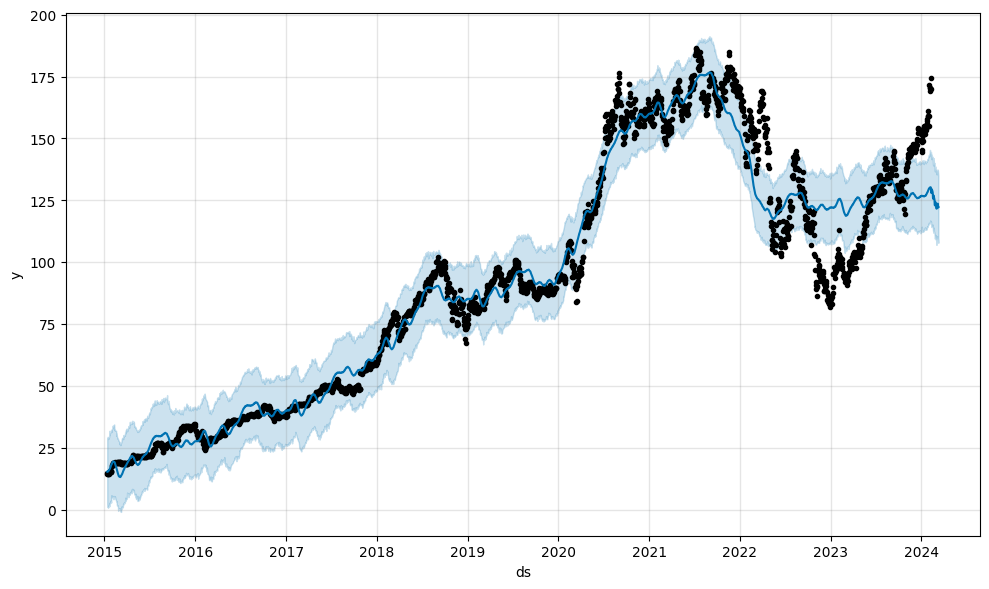

In [22]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

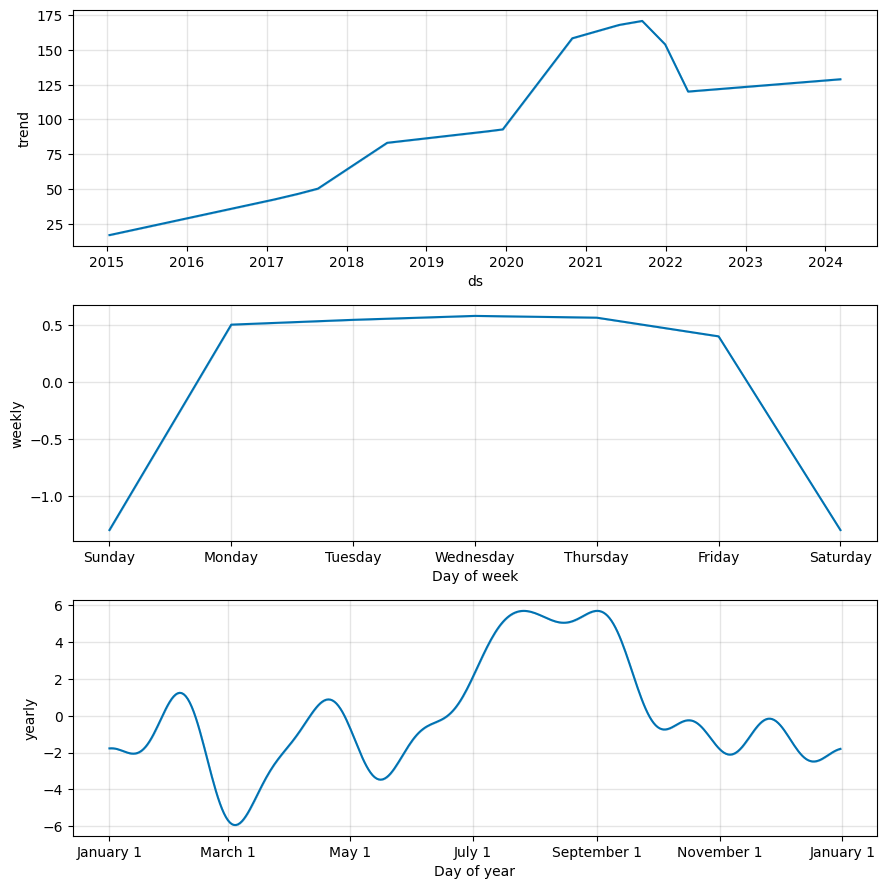

In [23]:
figure2 = model.plot_components(forecast)

##Download the forecast data

In [24]:
from google.colab import files

In [25]:
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>